# Introduction
In this notebook we will finally be taking a deep dive into the data we have scraped to gain interesting insights on the powerlifting community. I am particulary interested in what meterics effect strength, particularly the bench press.

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd
import geopandas as gpd
from collections import Counter
import sys

In [29]:
sys.path.append("../src")

from visualizations.charts import plot_bar_graph, plot_pie_chart, plot_histogram,show_column_stats, plot_scatterplot

In [30]:
PROCESSED_DATA_PATH = "../data/processed/processed_lifting_data.csv"

df = pd.read_csv(PROCESSED_DATA_PATH)

df.head()

,Name,Instagram_Handle,Origin,Federation,Competition_Date,Competition_Country,Competition_City,Gender,Equipment,Age,...,Class,Squat,Bench,Deadlift,Total,Dots,Bench_Per_Body_Weight,Squat_Per_Body_Weight,Deadlift_Per_Body_Weight,Total_Per_Body_Weight
0,Marianna Gasparyan,power_mayan,USA,WRPF,2019-04-27,USA,CA,F,Wraps,30.0,...,123.0,573.2,292.1,485.0,1350.3,709.96,2.367099,4.645057,3.930308,10.942464
1,Kristy Hawkins,kristy_hawkins,USA,WRPF,2022-07-29,USA,VA,F,Wraps,41.0,...,165.0,639.3,336.2,611.7,1587.3,704.76,2.052503,3.902930,3.734432,9.690476
2,Hunter Henderson #1,huntermhenderson,USA,WRPF,2021-04-24,USA,CA,F,Wraps,26.0,...,165.0,650.3,325.1,573.2,1548.7,687.63,1.984737,3.970085,3.499389,9.454823
3,Chakera Ingram,c.c_ingram,USA,USPA,2019-08-03,USA,TX,F,Wraps,24.0,...,181.0,639.3,374.8,595.2,1609.3,686.14,2.115124,3.607788,3.358916,9.081828
4,Stefanie Cohen,steficohen,USA,WRPF,2019-04-27,USA,CA,F,Wraps,27.0,...,123.0,507.0,242.5,529.1,1278.6,685.45,2.022519,4.228524,4.412844,10.663887


In [31]:
df.describe()

,Age,Weight,Class,Squat,Bench,Deadlift,Total,Dots,Bench_Per_Body_Weight,Squat_Per_Body_Weight,Deadlift_Per_Body_Weight,Total_Per_Body_Weight
count,351766.000000,453800.000000,449554.000000,327802.000000,425852.000000,365786.000000,453800.000000,453800.000000,425852.000000,327802.000000,365786.000000,453800.000000
mean,28.272801,183.941611,187.430831,362.089047,243.257436,417.651622,827.343178,273.518067,1.306320,1.959076,2.284019,4.486578
std,11.316052,47.174938,45.584852,132.885636,99.749380,132.321099,434.923364,121.208654,0.408713,0.525525,0.550589,2.067172
min,0.000000,35.000000,59.000000,2.200000,8.800000,2.200000,26.400000,15.050000,0.130332,0.009821,0.013639,0.210863
25%,20.000000,148.800000,152.000000,253.500000,154.300000,308.600000,446.400000,156.717500,0.998188,1.596051,1.904172,2.561230
50%,26.000000,179.600000,183.000000,358.200000,245.000000,424.400000,804.700000,303.140000,1.323276,1.964286,2.291580,4.796814
75%,33.000000,213.200000,220.000000,451.900000,314.100000,515.000000,1179.400000,365.570000,1.595305,2.315949,2.658920,6.113102
max,96.000000,573.200000,341.000000,1102.300000,782.600000,1030.600000,2606.900000,709.960000,3.915957,6.123737,7.515152,16.143939


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453800 entries, 0 to 453799
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Name                      453800 non-null  object 
 1   Instagram_Handle          9229 non-null    object 
 2   Origin                    266584 non-null  object 
 3   Federation                453800 non-null  object 
 4   Competition_Date          453800 non-null  object 
 5   Competition_Country       453800 non-null  object 
 6   Competition_City          309166 non-null  object 
 7   Gender                    453800 non-null  object 
 8   Equipment                 453800 non-null  object 
 9   Age                       351766 non-null  float64
 10  Weight                    453800 non-null  float64
 11  Class                     449554 non-null  float64
 12  Squat                     327802 non-null  float64
 13  Bench                     425852 non-null  f

### Number of meets by country

In [33]:
print(f'Over {len(df["Competition_Country"].unique())} countries host powerlifting competitons')

Over 111 countries host powerlifting competitons


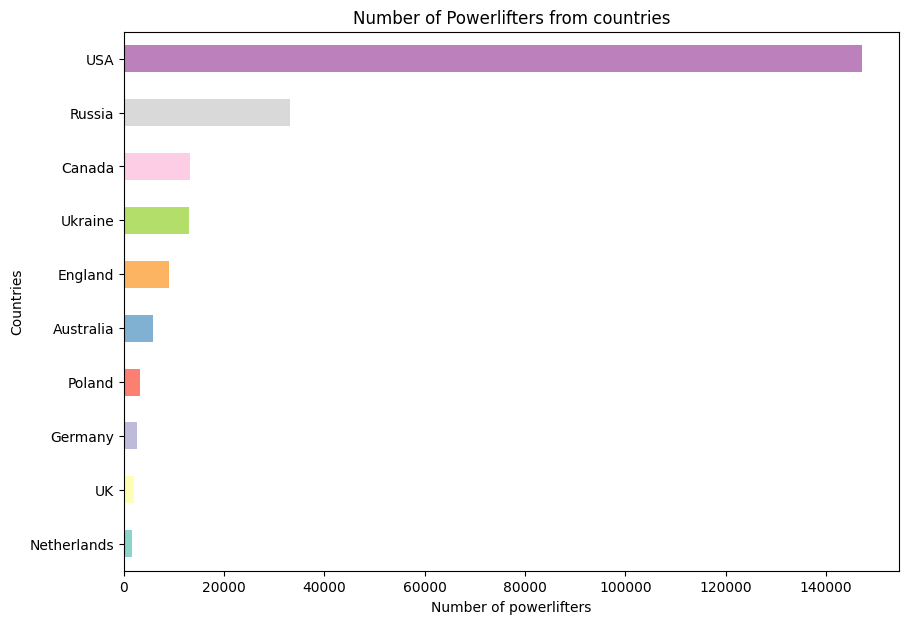

Netherlands      1558
UK               1933
Germany          2699
Poland           3219
Australia        5820
England          9047
Ukraine         12883
Canada          13216
Russia          33205
USA            147198
Name: Origin, dtype: int64

In [34]:
origin_counts = df["Origin"].value_counts()[:10].sort_values(ascending=True)

plot_bar_graph(
    data=origin_counts,
    title="Number of Powerlifters from countries", 
    xlabel="Number of powerlifters", 
    ylabel="Countries", 
    kind='barh'
)

origin_counts

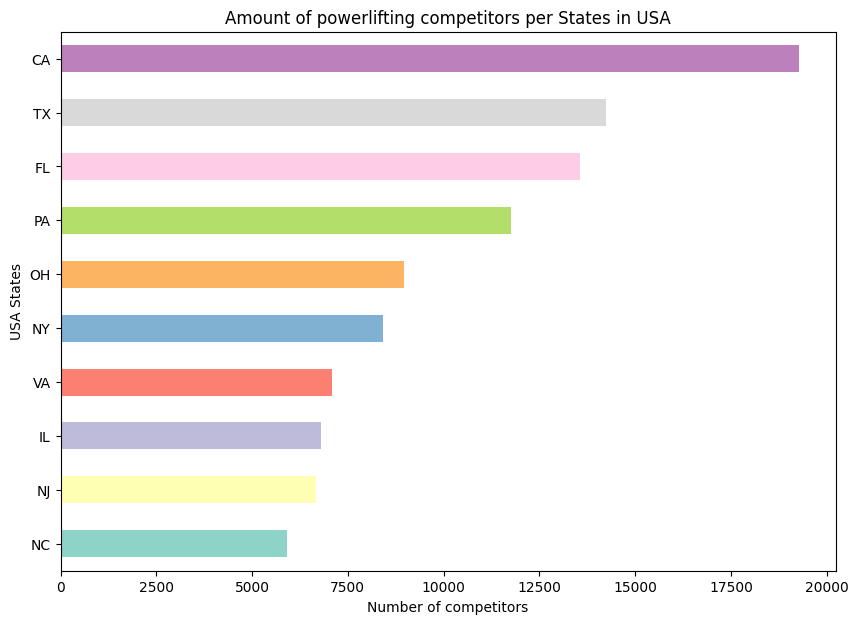

NC     5909
NJ     6675
IL     6786
VA     7078
NY     8428
OH     8961
PA    11758
FL    13558
TX    14231
CA    19266
Name: Competition_City, dtype: int64

In [35]:
state_competitions = df.loc[df["Competition_Country"] == "USA"]["Competition_City"].value_counts()[:10].sort_values(ascending=True)

plot_bar_graph(
    data=state_competitions,
    title="Amount of powerlifting competitors per States in USA", 
    xlabel="Number of competitors", 
    ylabel="USA States", 
    kind='barh'
)

state_competitions

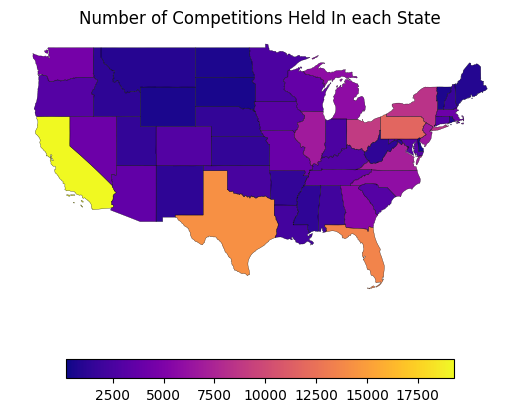

In [36]:
USA_city_df = df.loc[df["Competition_Country"] == "USA"]["Competition_City"].value_counts()
USA_city_df = USA_city_df.to_frame().reset_index()
USA_city_df.columns = ["Competition_City", "Count"]
states = gpd.read_file("../data/assets/cb_2018_us_state_20m.shp")
type(states)

shape = pd.merge(
    left = states,
    right = USA_city_df, 
    left_on="STUSPS",
    right_on="Competition_City",
    how='left'
)

shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10,5))
shape.plot(ax=ax, column='Count', legend=True, cmap='plasma', legend_kwds = {'shrink':0.5,'orientation':'horizontal'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'left', 'bottom', 'top']:
    ax.spines[edge].set_visible(False)

ax.set_title("Number of Competitions Held In each State", size=12)

plt.show()

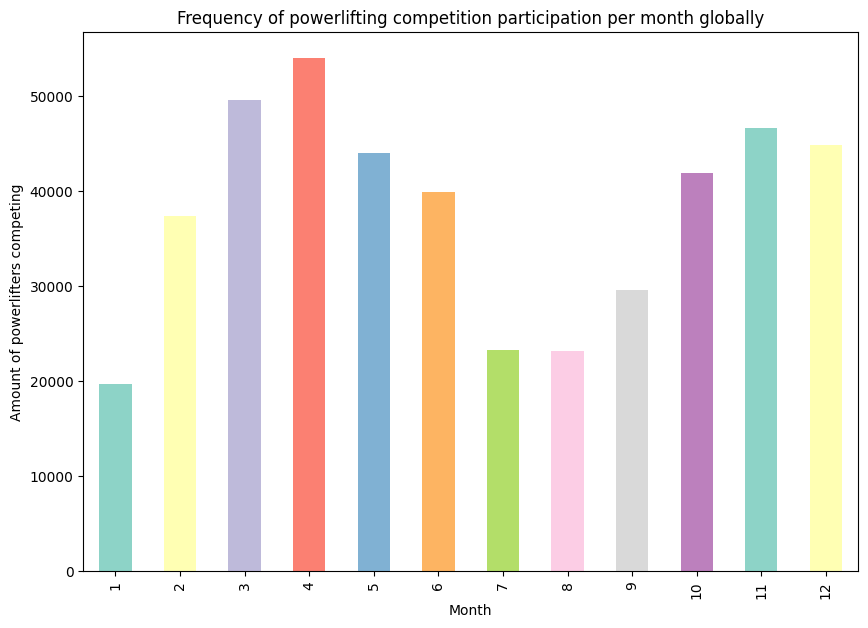

In [37]:
month_counts = pd.to_datetime(df['Competition_Date']).dt.month.value_counts().sort_index()

plot_bar_graph(
    data=month_counts,
    title="Frequency of powerlifting competition participation per month globally", 
    xlabel="Month", 
    ylabel="Amount of powerlifters competing", 
    kind='bar'
)

C:\Users\pknad\AppData\Local\Temp\ipykernel_28940\3185185907.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  year_counts = pd.to_datetime(df['Competition_Date']).dt.year.value_counts().sort_values(ascending=False)[:12].sort_index()


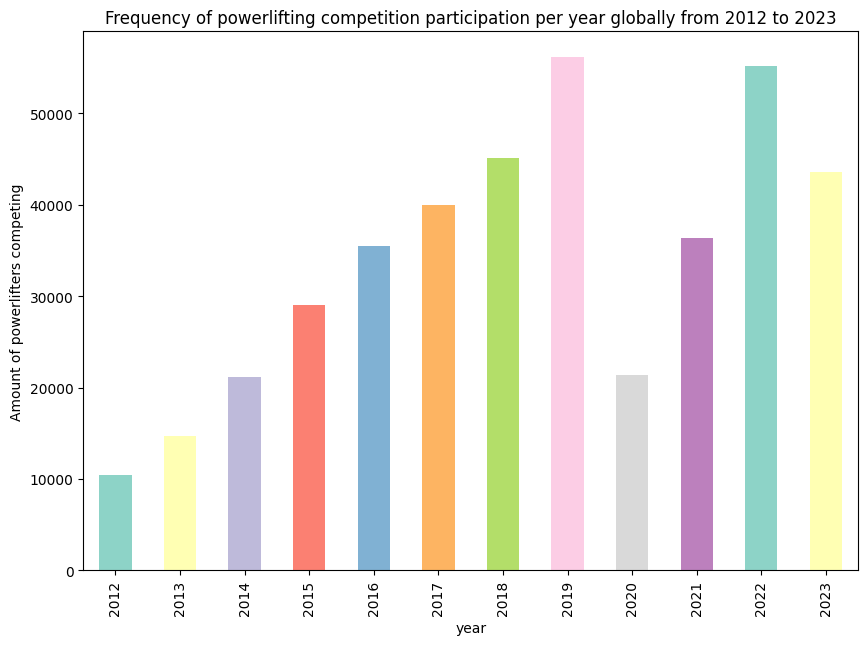

In [38]:
year_counts = pd.to_datetime(df['Competition_Date']).dt.year.value_counts().sort_values(ascending=False)[:12].sort_index()

plot_bar_graph(
    data=year_counts,
    title="Frequency of powerlifting competition participation per year globally from 2012 to 2023", 
    xlabel="year", 
    ylabel="Amount of powerlifters competing", 
    kind='bar'
)

we can see COVID drastically reduced the number of participants in 2020

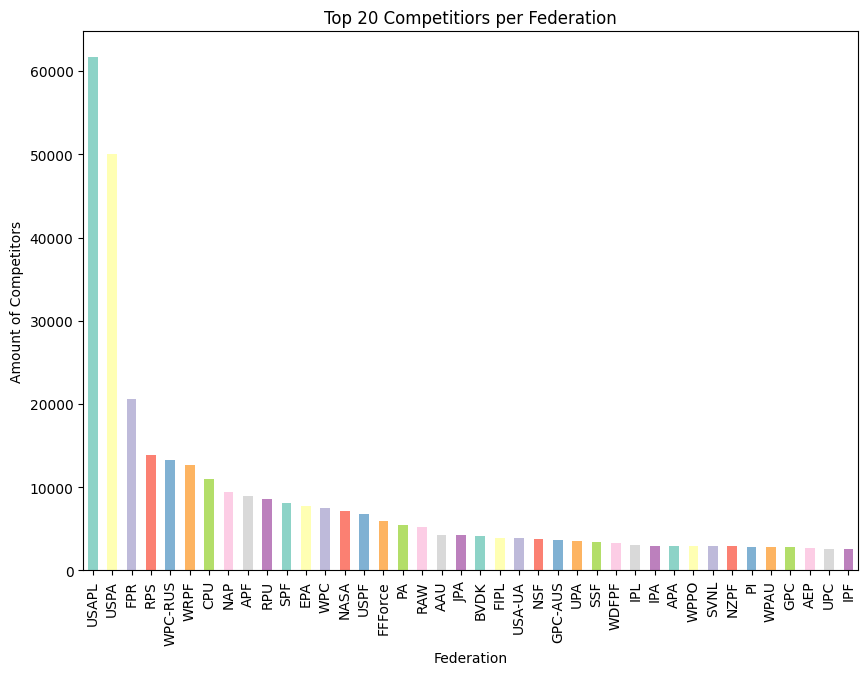

Federation statistics
count     453800
unique       345
top        USAPL
freq       61667
Name: Federation, dtype: object


In [39]:
# Look at distribution of federation
federation_counts = df["Federation"].value_counts()[:40]
plot_bar_graph(
    data=federation_counts,
    title="Top 20 Competitiors per Federation", 
    xlabel="Federation", 
    ylabel="Amount of Competitors", 
    kind='bar'
)

show_column_stats(data=df, column="Federation")

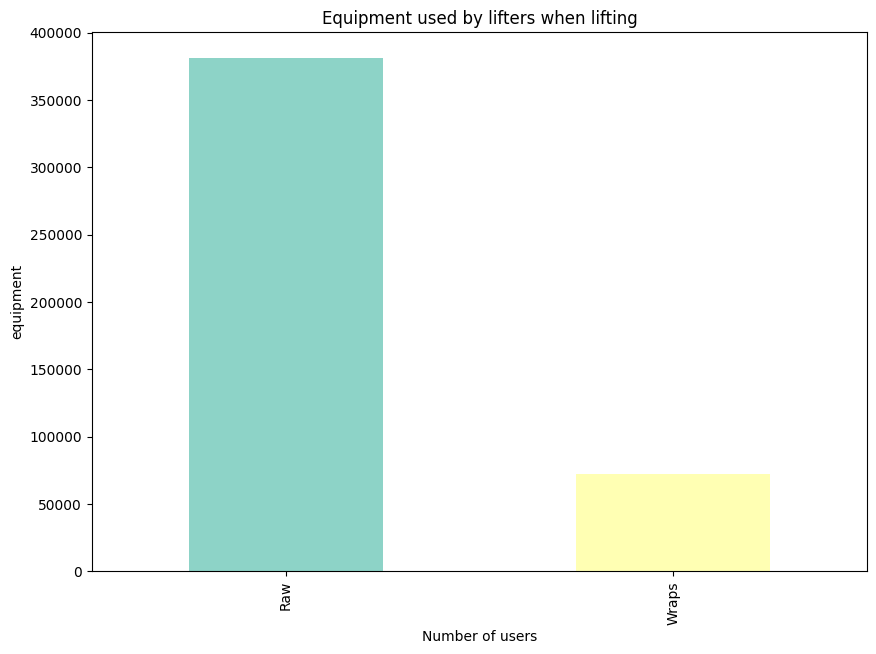

In [40]:
# Look at distribution of Equipment
equipment_counts = df["Equipment"].value_counts()

plot_bar_graph(
    data=equipment_counts,
    title="Equipment used by lifters when lifting", 
    xlabel="Number of users", 
    ylabel="equipment", 
    kind="bar"
)


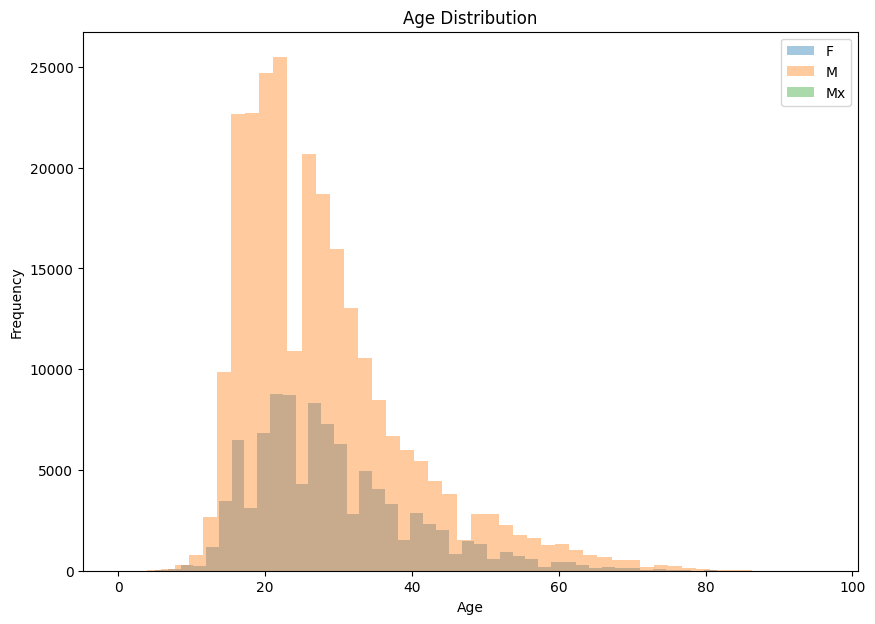

Age statistics for F
count    97646.000000
mean        28.981443
std         10.967212
min          5.000000
25%         21.000000
50%         27.000000
75%         35.000000
max         92.000000
Name: Age, dtype: float64

Age statistics for M
count    254099.000000
mean         28.000327
std          11.435711
min           0.000000
25%          20.000000
50%          25.000000
75%          33.000000
max          96.000000
Name: Age, dtype: float64

Age statistics for Mx
count    21.000000
mean     30.142857
std      10.248345
min      16.000000
25%      24.000000
50%      29.000000
75%      35.000000
max      58.000000
Name: Age, dtype: float64



In [41]:
# look at distribution of Age
plot_histogram(
    data=df,
    title="Age Distribution",
    bins=50,
    xlabel="Age",
    ylabel="Frequency",
    hue="Gender",
    column="Age",
)

show_column_stats(data=df, column="Age", hue="Gender")

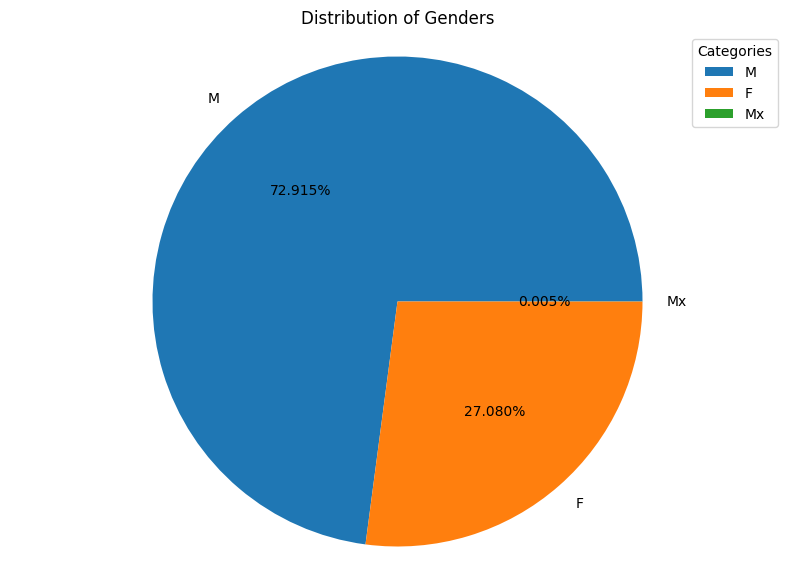

In [42]:
# Look at distribution of Gender
gender_counts = df["Gender"].value_counts()

plot_pie_chart(
    data=gender_counts,
    title="Distribution of Genders",
    digit_format="%1.3f%%"
)

The sport seems to be heavily male dominated

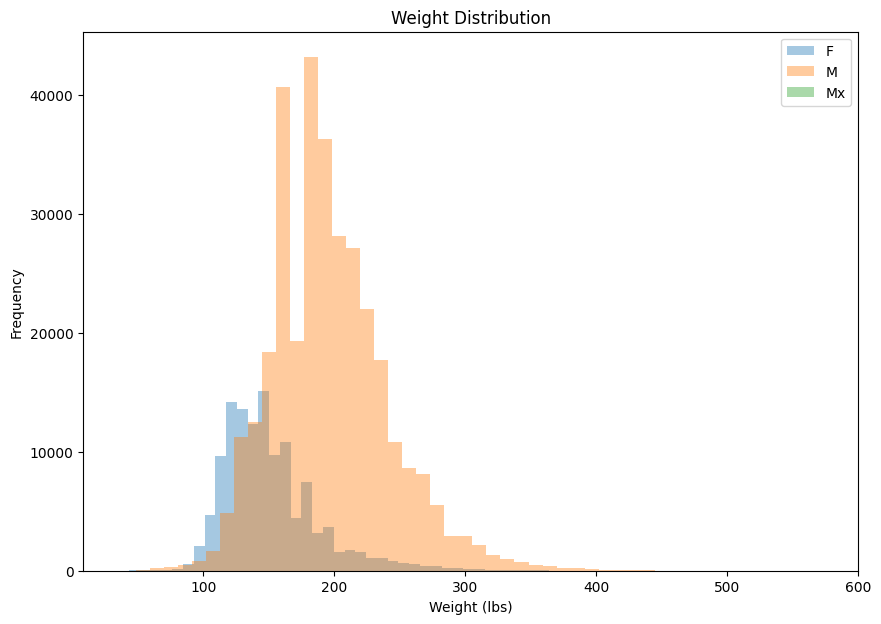

Weight statistics for F
count    122889.000000
mean        150.845612
std          37.014811
min          35.000000
25%         125.000000
50%         144.800000
75%         165.300000
max         446.400000
Name: Weight, dtype: float64

Weight statistics for M
count    330887.000000
mean        196.232755
std          44.556637
min          37.700000
25%         164.400000
50%         193.100000
75%         220.400000
max         573.200000
Name: Weight, dtype: float64

Weight statistics for Mx
count     24.000000
mean     190.375000
std       46.244532
min      102.000000
25%      164.325000
50%      180.650000
75%      221.450000
max      279.200000
Name: Weight, dtype: float64



In [43]:
COLUMN="Weight"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

In [44]:
df.columns

Index(['Name', 'Instagram_Handle', 'Origin', 'Federation', 'Competition_Date',
       'Competition_Country', 'Competition_City', 'Gender', 'Equipment', 'Age',
       'Weight', 'Class', 'Squat', 'Bench', 'Deadlift', 'Total', 'Dots',
       'Bench_Per_Body_Weight', 'Squat_Per_Body_Weight',
       'Deadlift_Per_Body_Weight', 'Total_Per_Body_Weight'],
      dtype='object')

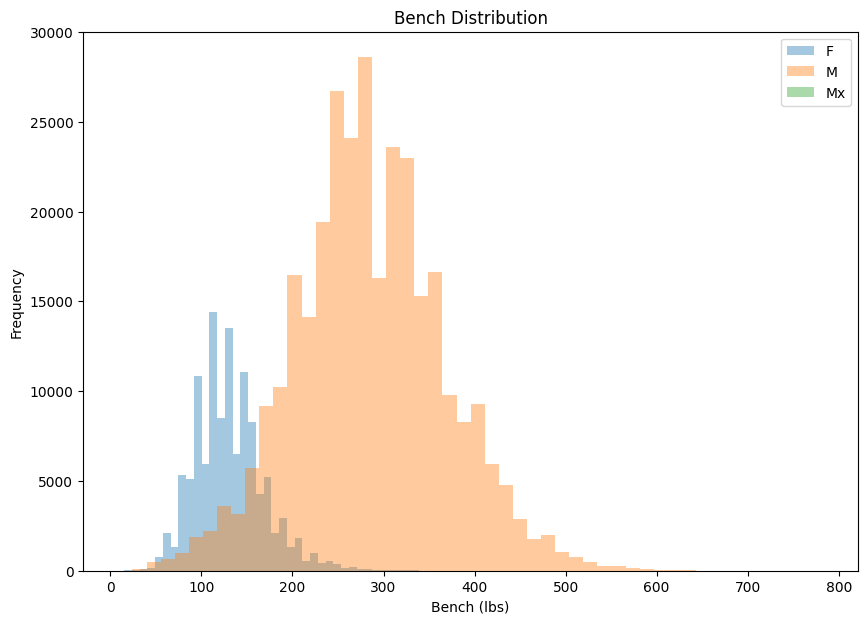

Bench statistics for F
count    115499.000000
mean        131.085196
std          38.410522
min          15.000000
25%         104.700000
50%         126.700000
75%         154.300000
max         440.900000
Name: Bench, dtype: float64

Bench statistics for M
count    310330.000000
mean        285.013052
std          81.714806
min           8.800000
25%         231.500000
50%         281.100000
75%         336.200000
max         782.600000
Name: Bench, dtype: float64

Bench statistics for Mx
count     23.000000
mean     145.917391
std       51.990354
min       66.100000
25%      110.200000
50%      132.200000
75%      165.300000
max      265.000000
Name: Bench, dtype: float64



In [45]:
COLUMN="Bench"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

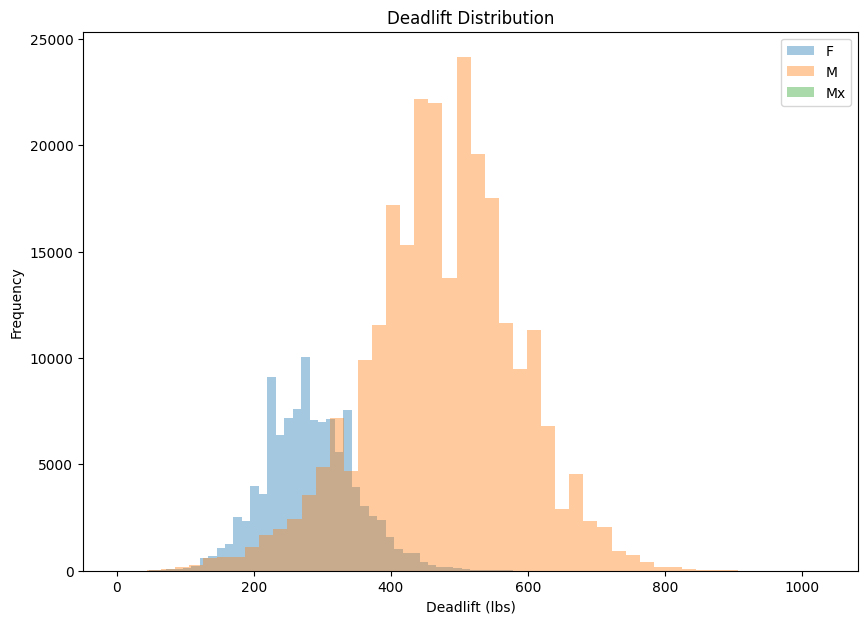

Deadlift statistics for F
count    108970.000000
mean        281.722397
std          66.479539
min          22.000000
25%         237.000000
50%         280.000000
75%         325.100000
max         639.300000
Name: Deadlift, dtype: float64

Deadlift statistics for M
count    256792.000000
mean        475.344561
std         109.058739
min           2.200000
25%         407.800000
50%         479.500000
75%         545.600000
max        1030.600000
Name: Deadlift, dtype: float64

Deadlift statistics for Mx
count     24.000000
mean     297.758333
std       89.883291
min      148.800000
25%      220.400000
50%      286.600000
75%      344.450000
max      500.000000
Name: Deadlift, dtype: float64



In [46]:
COLUMN="Deadlift"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

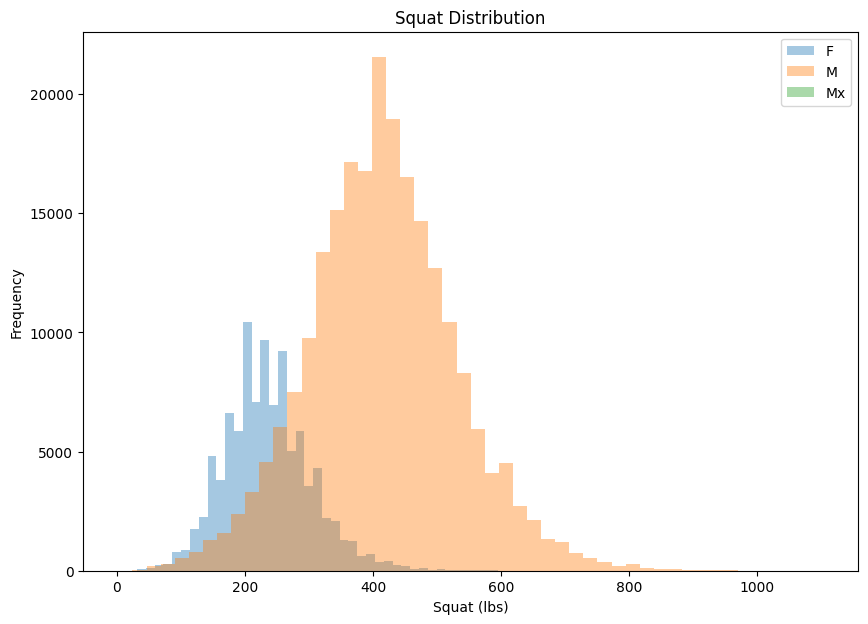

Squat statistics for F
count    99338.000000
mean       235.864296
std         68.160279
min         17.600000
25%        187.400000
50%        231.500000
75%        275.500000
max        705.400000
Name: Squat, dtype: float64

Squat statistics for M
count    228441.000000
mean        416.989764
std         115.647920
min           2.200000
25%         341.700000
50%         413.300000
75%         485.000000
max        1102.300000
Name: Squat, dtype: float64

Squat statistics for Mx
count     23.000000
mean     246.426087
std       88.987763
min       99.200000
25%      176.300000
50%      248.000000
75%      303.100000
max      460.000000
Name: Squat, dtype: float64



In [47]:
COLUMN="Squat"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)


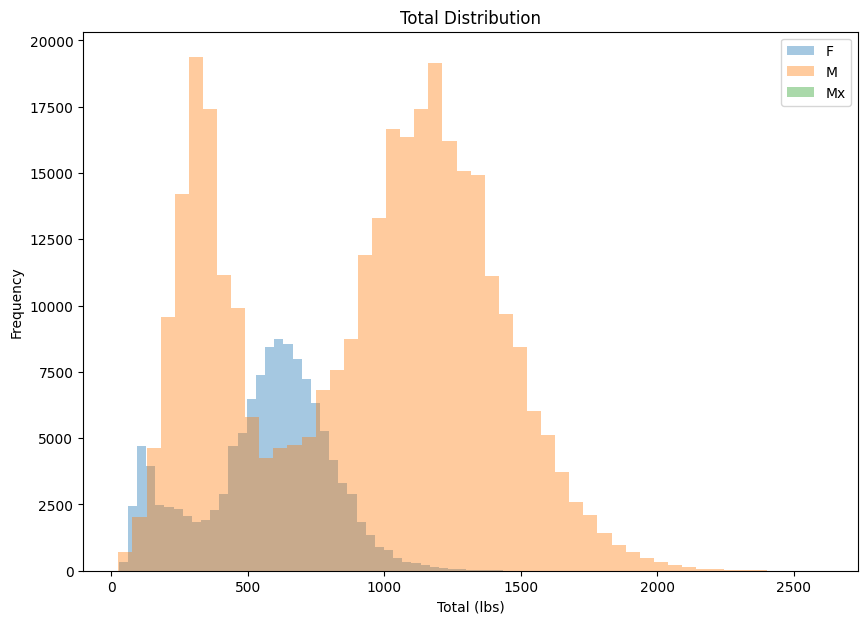

Total statistics for F
count    122889.000000
mean        563.965380
std         235.757243
min          27.500000
25%         435.400000
50%         595.200000
75%         722.000000
max        1703.000000
Name: Total, dtype: float64

Total statistics for M
count    330887.000000
mean        925.170892
std         451.046806
min          26.400000
25%         451.900000
50%        1019.600000
75%        1267.600000
max        2606.900000
Name: Total, dtype: float64

Total statistics for Mx
count      24.000000
mean      673.825000
std       234.401629
min       303.100000
25%       511.200000
50%       636.550000
75%       788.125000
max      1225.000000
Name: Total, dtype: float64



In [48]:
COLUMN="Total"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

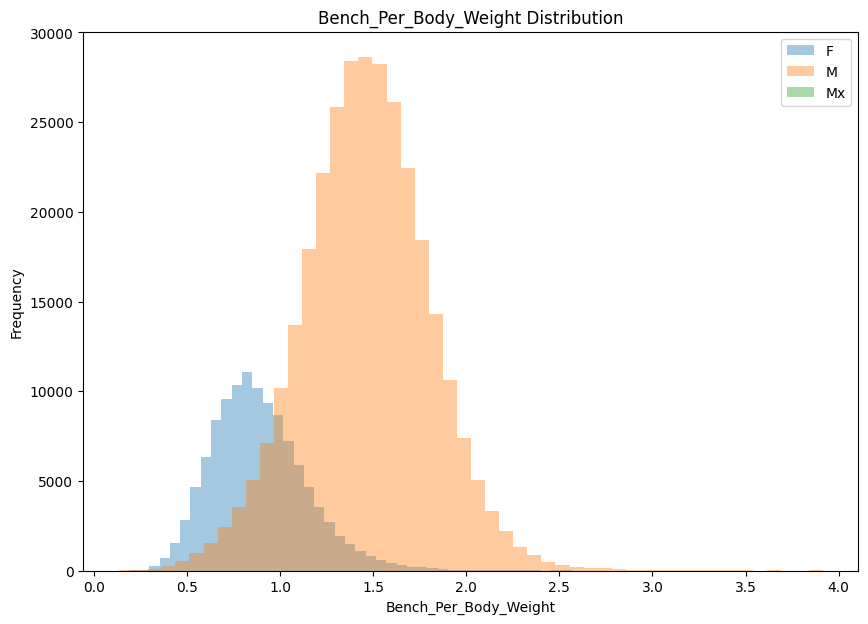

Bench_Per_Body_Weight statistics for F
count    115499.000000
mean          0.888207
std           0.255927
min           0.130332
25%           0.709220
50%           0.860677
75%           1.035897
max           2.897938
Name: Bench_Per_Body_Weight, dtype: float64

Bench_Per_Body_Weight statistics for M
count    310330.000000
mean          1.461972
std           0.339905
min           0.134146
25%           1.243283
50%           1.460754
75%           1.678766
max           3.915957
Name: Bench_Per_Body_Weight, dtype: float64

Bench_Per_Body_Weight statistics for Mx
count    23.000000
mean      0.787822
std       0.277508
min       0.438745
25%       0.623602
50%       0.715044
75%       0.850202
max       1.641884
Name: Bench_Per_Body_Weight, dtype: float64



In [55]:
COLUMN="Bench_Per_Body_Weight"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN}",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

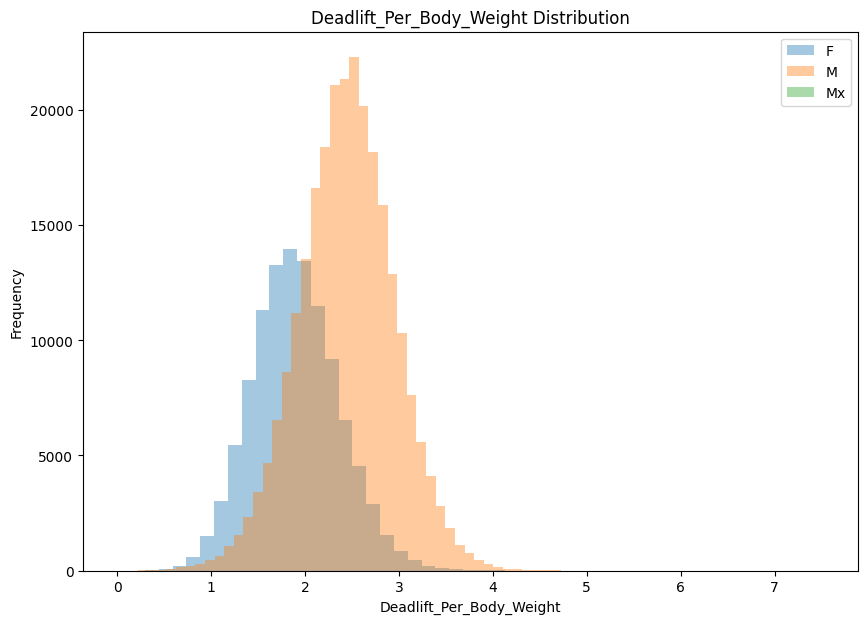

Deadlift_Per_Body_Weight statistics for F
count    108970.000000
mean          1.901667
std           0.457810
min           0.148951
25%           1.584100
50%           1.881831
75%           2.198670
max           7.515152
Name: Deadlift_Per_Body_Weight, dtype: float64

Deadlift_Per_Body_Weight statistics for M
count    256792.000000
mean          2.446334
std           0.504412
min           0.013639
25%           2.120431
50%           2.452461
75%           2.777554
max           5.132933
Name: Deadlift_Per_Body_Weight, dtype: float64

Deadlift_Per_Body_Weight statistics for Mx
count    24.000000
mean      1.595197
std       0.464286
min       1.015438
25%       1.291742
50%       1.482364
75%       1.689400
max       3.097893
Name: Deadlift_Per_Body_Weight, dtype: float64



In [56]:
COLUMN="Deadlift_Per_Body_Weight"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN}",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

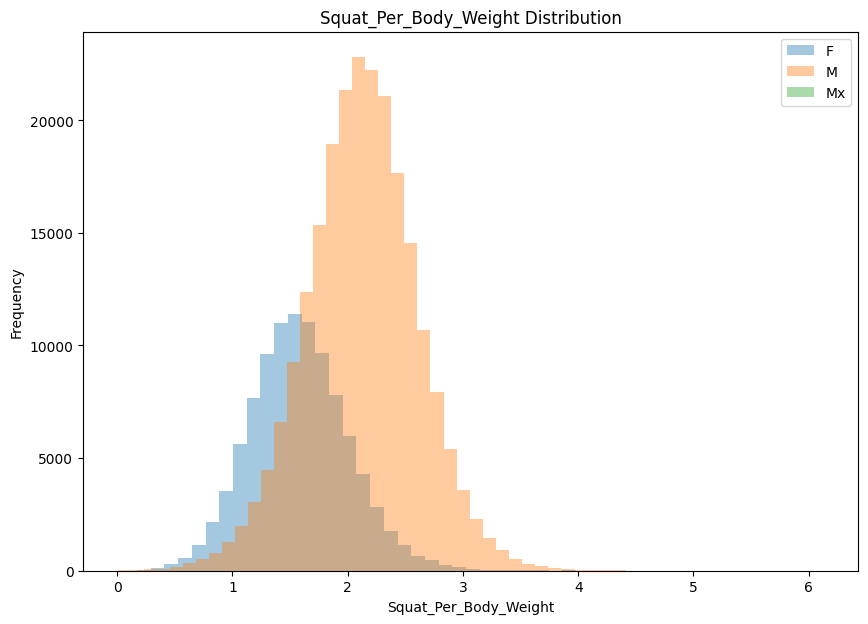

Squat_Per_Body_Weight statistics for F
count    99338.000000
mean         1.579218
std          0.424947
min          0.170713
25%          1.289756
50%          1.562969
75%          1.845920
max          6.123737
Name: Squat_Per_Body_Weight, dtype: float64

Squat_Per_Body_Weight statistics for M
count    228441.000000
mean          2.124321
std           0.477141
min           0.009821
25%           1.820306
50%           2.128218
75%           2.432937
max           5.652520
Name: Squat_Per_Body_Weight, dtype: float64

Squat_Per_Body_Weight statistics for Mx
count    23.000000
mean      1.333373
std       0.467910
min       0.494024
25%       1.041909
50%       1.348776
75%       1.515132
max       2.850062
Name: Squat_Per_Body_Weight, dtype: float64



In [57]:
COLUMN="Squat_Per_Body_Weight"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN}",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

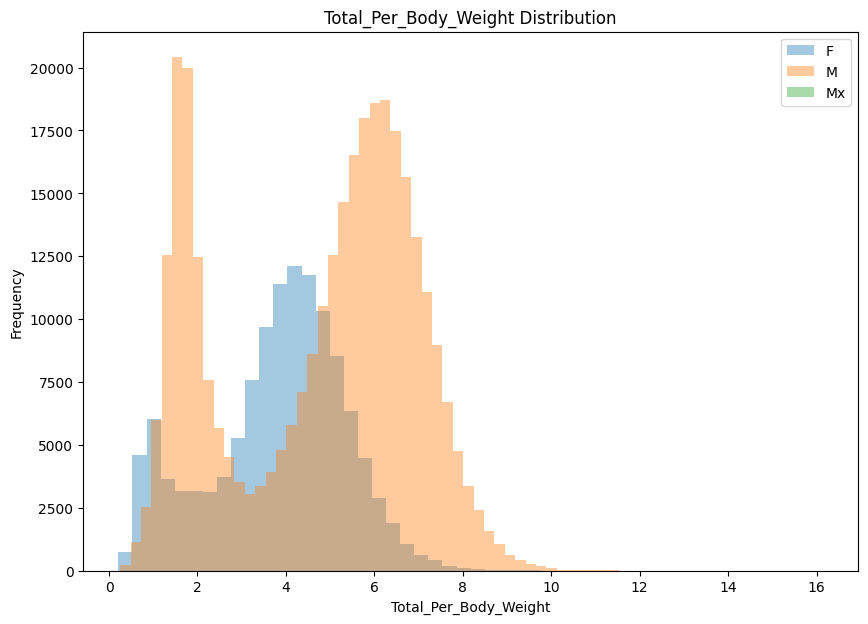

Total_Per_Body_Weight statistics for F
count    122889.000000
mean          3.799604
std           1.544344
min           0.210863
25%           2.926625
50%           4.017857
75%           4.858250
max          16.143939
Name: Total_Per_Body_Weight, dtype: float64

Total_Per_Body_Weight statistics for M
count    330887.000000
mean          4.741777
std           2.175827
min           0.250000
25%           2.360364
50%           5.336992
75%           6.431409
max          12.003781
Name: Total_Per_Body_Weight, dtype: float64

Total_Per_Body_Weight statistics for Mx
count    24.000000
mean      3.628379
std       1.255464
min       1.324738
25%       3.003702
50%       3.420154
75%       4.004424
max       7.589839
Name: Total_Per_Body_Weight, dtype: float64



In [58]:
COLUMN="Total_Per_Body_Weight"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN}",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

Interesting... for some reason the totals have a bimodal distribution, I wonder why this is the case? I think it is because some people only participate in one of the lifts while others participate in all three causing there to be a bimodal distribution

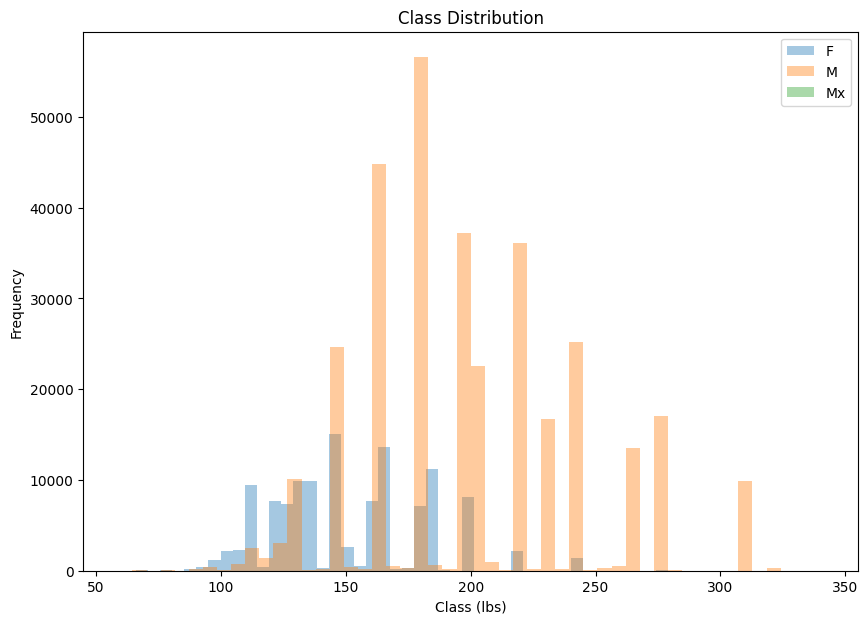

Class statistics for F
count    121491.000000
mean        151.631067
std          30.099065
min          66.000000
25%         125.000000
50%         148.000000
75%         176.000000
max         308.000000
Name: Class, dtype: float64

Class statistics for M
count    328040.000000
mean        200.688602
std          43.146107
min          59.000000
25%         165.000000
50%         198.000000
75%         231.000000
max         341.000000
Name: Class, dtype: float64

Class statistics for Mx
count     23.000000
mean     199.173913
std       50.600622
min      105.000000
25%      173.000000
50%      185.000000
75%      220.000000
max      308.000000
Name: Class, dtype: float64



In [49]:
COLUMN="Class"
HUE="Gender"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

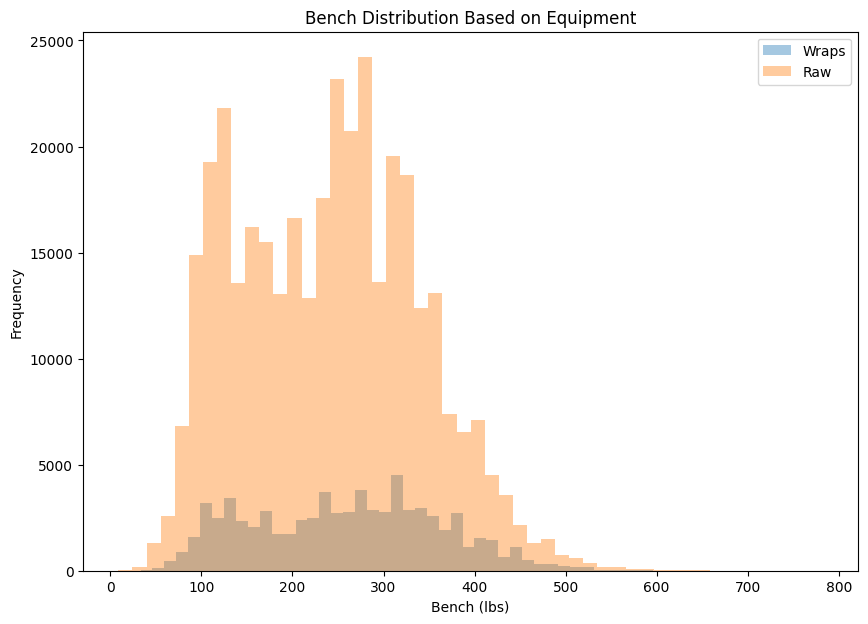

Bench statistics for Wraps
count    71755.000000
mean       259.186871
std        103.883295
min         20.000000
25%        170.800000
50%        264.500000
75%        335.000000
max        675.000000
Name: Bench, dtype: float64

Bench statistics for Raw
count    354097.000000
mean        240.029460
std          98.577608
min           8.800000
25%         154.300000
50%         242.500000
75%         308.600000
max         782.600000
Name: Bench, dtype: float64



In [50]:
COLUMN="Bench"
HUE="Equipment"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution Based on Equipment",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

For the bench wraps seem to give a slight advantage with a slightly higher average

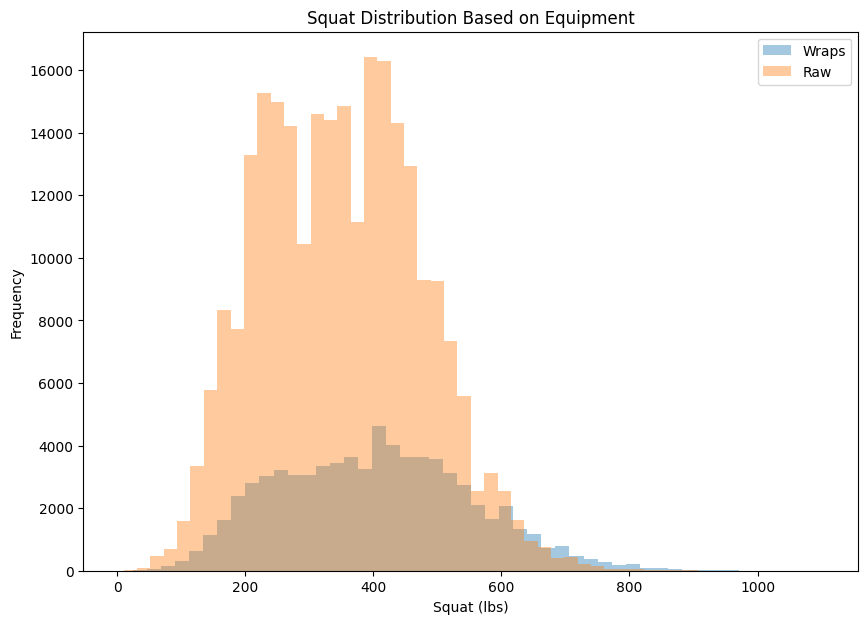

Squat statistics for Wraps
count    72251.000000
mean       405.763731
std        150.714263
min          2.200000
25%        286.600000
50%        402.300000
75%        507.000000
max       1102.300000
Name: Squat, dtype: float64

Squat statistics for Raw
count    255551.000000
mean        349.741063
std         124.649051
min          10.300000
25%         248.000000
50%         352.700000
75%         440.900000
max        1052.700000
Name: Squat, dtype: float64



In [51]:
COLUMN="Squat"
HUE="Equipment"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution Based on Equipment",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

For squat there seems to be a even greater advantage for using wraps however I wouldn't which makes sense because leg wraps allow you to be more explosive

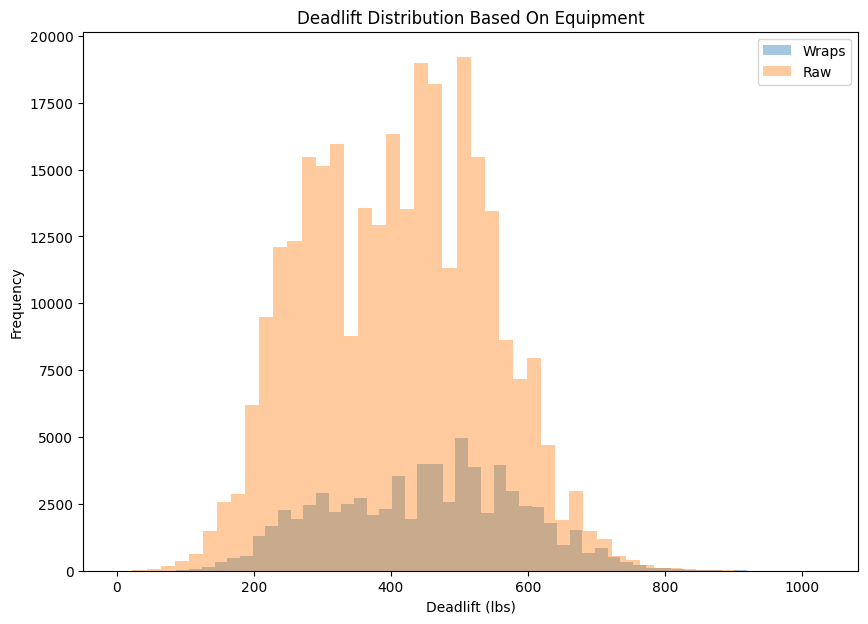

Deadlift statistics for Wraps
count    71800.000000
mean       449.659223
std        138.048631
min         50.000000
25%        340.000000
50%        462.900000
75%        551.100000
max        975.500000
Name: Deadlift, dtype: float64

Deadlift statistics for Raw
count    293986.000000
mean        409.834428
std         129.689691
min           2.200000
25%         303.100000
50%         418.800000
75%         507.000000
max        1030.600000
Name: Deadlift, dtype: float64



In [52]:
COLUMN="Deadlift"
HUE="Equipment"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution Based On Equipment",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

Suprising, I would have expected a much greater increase in performance when using wraps for the deadlift because wraps significantly help with grip strength; however 50 pound average increase is still quite a bit

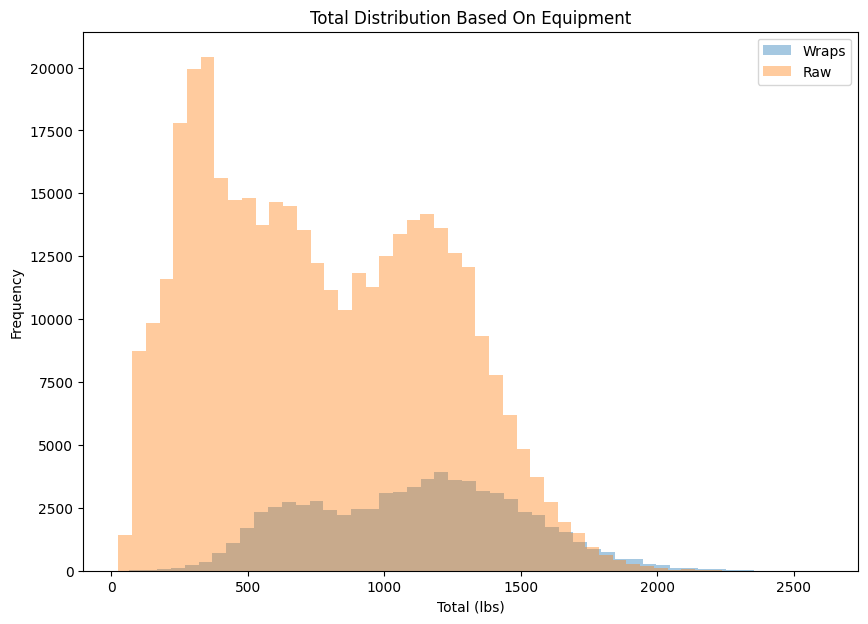

Total statistics for Wraps
count    72493.000000
mean      1109.376289
std        384.672281
min         66.100000
25%        793.600000
50%       1129.800000
75%       1388.900000
max       2606.900000
Name: Total, dtype: float64

Total statistics for Raw
count    381307.000000
mean        773.723847
std         423.073655
min          26.400000
25%         396.800000
50%         727.500000
75%        1124.300000
max        2540.800000
Name: Total, dtype: float64



In [53]:
COLUMN="Total"
HUE="Equipment"

plot_histogram(
    data=df,
    title=f"{COLUMN} Distribution Based On Equipment",
    bins=50,
    xlabel=f"{COLUMN} (lbs)",
    ylabel="Frequency",
    hue=HUE,
    column=COLUMN,
)

show_column_stats(data=df, column=COLUMN, hue=HUE)

Wow so it seems wraps overall seem to have a very strong impact on the total amount of weight a lifter can push with the average being nearly 1100 pounds. I wonder if this is because wraps provide a significant advantage or if people who use wraps tend to be more experienced and stronger lifters.

TODO: Look at strength relations  
    How is strength related to:  
        Age  
        Federation   
        Gender  
        Weight  
        Origin  
        Equipment  
        class  
    Look at how strength has changed over the years  
    Look at what times of month are people the strongest  
Explore how many people do each of the lifts for instance how many do all three list, vs how many do only bench, vs only squat, vs only deadlift